# Modulo Analisi di Dati A.A. 2021/2022 - HR Dataset 
#### Realizzato da Chiara Giurdanella (560686) e Simona Sette (544298)  
***

Il dataset oggetto di analisi è composto da dati relativi a 311 dipendenti di una società fittizia. Ulteriori informazioni sono reperibili al seguente link: [Human Resources Data Set](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set).<br> La fase preliminare è consistita nell'importare le librerie necessarie per la conduzione delle analisi.

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from datetime import date,datetime
from dateutil.relativedelta import relativedelta
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#lettura del file csv
df=pd.read_csv('HRDataset_v14.csv')

In [ ]:
#esecuzione del comando shape che restituisce la dimensionalità del dataframe
df.shape

(311, 36)

Il dataset si compone di 311 record e di 36 colonne, ciascuna delle quali identifica una specifica variabile. Per avere un'idea di come è strutturalmente composto il set e della natura dei dati, sono state stampate le prime e le ultime righe del dataset.<br> La stampa della struttura tabellare corrispondente è stata omessa dal file pdf per motivi di spazio.

In [ ]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
df.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,...,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


## Semantica dei dati

Allo scopo di comprendere la semantica dei dati si è fatto ricorso all'utilizzo del metodo *dtypes* della libreria Pandas, che ci consente di ottenere il tipo di dati contenuti in ogni colonna.
Per fornire una semantica più compatta si è preferito estrarre i dati raccolti tramite questo metodo e, insieme a una descrizione in linguaggio naturale della semantica degli attributi, inserirli in un'apposita tabella.

Come per i metodi *head* e *tail*, anche la stampa di *dtypes* è stata omessa dal file pdf per la medesima ragione.

In [ ]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

Attributi |Tipi di dato | Descrizione 
------------|-------------|------------
Employee Name	| Nome completo dell'impiegato |	 Oggetto(Testo)
EmpID	|Identificatore numerico univoco di ciascun impiegato| Intero
MarriedID	|Indicatore binario di stato matrimoniale: 1 se è sposato, 0 se non lo è	| Intero(Binario)
MaritalStatusID	|Codice di stato civile che corrisponde al campo di testo MaritalDesc |	Intero
GenderID |Identificatore binario del genere di appartenenza dell'impiegato |Intero (Binario)
EmpStatusID	|Codice dello stato occupazionale che corrisponde al campo di testo EmploymentStatus|	Intero
DeptID	|Codice ID del dipartimento che corrisponde al reparto in cui lavora l'impiegato	|Intero
PerfScoreID	|Codice del punteggio di prestazione che corrisponde al punteggio di prestazione più recente dell'impiegato|Intero
FromDiversityJobFairID|	L'impiegato è stato acquisito dalla fiera del lavoro Diversity? Indicatore binario: 1 per il si, 0 per il no	|Intero(Binario)
Salary |Lo stipendio annuale dell'impiegato in dollari USA	|Intero
Termd	|Indicatore binario di stato di assunzione terminato: 1 se licenziato, 0 se ancora attivo	|Intero(Binario)
PositionID | Intero che indica la posizione lavorativa dell' impiegato	|Intero
Position | Titolo/Nome testuale della posizione lavorativa che l'impiegato possiede	| Oggetto(Testo)
State	|Stato in cui l'impiegato vive|Oggetto(Testo)
Zip	|Codice di avviamento postale dell'impiegato|Intero
DOB	|Data di nascita dell'impiegato	|Oggetto(Data)
Sex	|Sesso - M o F	|Oggetto(Testo)
MaritalDesc	| Lo stato civile dell'impiegato (divorziato, single, vedovo, separato o sposato)|Oggetto(Testo)
CitizenDesc	|Etichetta per indicare se l'impiegato possiede la cittadinanza USA o se non la possiede ma è residente|Oggetto(Testo)
HispanicLatino	|Campo Sì/No per indicare se l'impiegato è ispanico/latino	|Oggetto(Testo)
RaceDesc	| Descrizione testuale dell'etnia in cui l'impiegato si identifica |Oggetto(Testo)
DateofHire |	Data di assunzione dell'impiegato |Oggetto(Data)
DateofTermination	| Data di cessione contratto dell'impiegato: valore presente solo in caso di licenziamento |Oggetto(Data)
TermReason	| Descrizione testuale della ragione per cui il contratto è stato cessato	|Oggetto(Testo)
EmploymentStatus |	Una descrizione/categoria dello stato lavorativo dell'impiegato. Chiunque attualmente lavori a tempo pieno = Attivo	|Oggetto(Testo)
Department |	Nome del dipartimento in cui lavora l'impiegato	|Oggetto(Testo)
ManagerName	|Nome del manager dell'impiegato|Oggetto(Testo)
ManagerID	|Identificatore univoco di ogni manager|Float
RecruitmentSource |	Il nome della fonte di reclutamento da cui è stato assunto l'impiegato	|Oggetto(Testo)
PerformanceScore	|Testo/categoria del punteggio di prestazione (Fully Meets, Partially Meets, PIP, Exceeds)	|Oggetto(Testo)
EngagementSurvey |Risultati dell'ultima indagine di coinvolgimento, gestita da partner esterno	|Float
EmpSatisfaction	| Un punteggio di soddisfazione compreso tra 1 e 5, come riportato da un recente sondaggio sulla soddisfazione degli impiegati |Intero
SpecialProjectsCount	|Il numero di progetti speciali a cui l'impiegato ha lavorato negli ultimi 6 mesi|Intero
LastPerformanceReviewDate |	La data più recente dell'ultima revisione delle prestazioni dell'impiegato.	|Oggetto (Data)
DaysLateLast30	|Il numero di volte in cui l'impiegato è arrivato in ritardo a lavoro negli ultimi 30 giorni	|Intero
Absences |	Il numero di volte in cui l'impiegato si è assentato dal lavoro |	Intero


## Data quality

Questa sezione del lavoro è incentrata sulla ricerca di duplicati, valori mancanti e valori anomali, e sulla loro eventuale gestione, al fine di migliorare la qualità dei dati.

### Valori duplicati e missing values

Il primo passo è stato la ricerca di duplicati al fine di ridurre la dimensione del set di dati, ma non vi è alcuna prova di essi tra i record. 

In [ ]:
print('Valori duplicati: {}'.format(sum(df.duplicated())))

Valori duplicati: 0


Per quanto riguarda il secondo punto, sono stati individuati 215 missing values nel dataset.

In [ ]:
print('Valori Mancanti:', df.isnull().values.sum())

Valori Mancanti: 215


A questo punto, si è voluto identificare a quali attributi è riferita la mancanza di valori individuata; come visibile a seguire, è emersa la presenza di 207 missing values per la variabile *DateofTermination* e di 8 missing values per *ManagerID*.

In [ ]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Al fine di evitare che la presenza di questi ultimi possa distorcere i risultati dell'analisi, è stato deciso di trattare questi valori e di individuare le cause della loro mancanza.

Per quanto riguarda la variabile *ManagerID*, sono stati osservati singolarmente i record contenenti i missing values, essendo un numero esiguo.<br>
Sfruttando la colonna *ManagerName*, la quale contiene i nomi dei Manager, è emerso che tutti gli ID mancanti sono collegabili al nome "Webster Butler".

In [ ]:
EmptyID_ManagerName=df.loc[pd.isna(df['ManagerID']), 'ManagerName']
print(EmptyID_ManagerName)

19     Webster Butler
30     Webster Butler
44     Webster Butler
88     Webster Butler
135    Webster Butler
177    Webster Butler
232    Webster Butler
251    Webster Butler
Name: ManagerName, dtype: object


A questo punto, è stato ricavato il codice ID corrispettivo a tale persona.

In [ ]:
ID_ManagerName=df.loc[df['ManagerName']=="Webster Butler", 'ManagerID']
print(ID_ManagerName)

4      39.0
19      NaN
30      NaN
44      NaN
65     39.0
88      NaN
89     39.0
105    39.0
124    39.0
135     NaN
151    39.0
174    39.0
177     NaN
198    39.0
206    39.0
214    39.0
232     NaN
251     NaN
276    39.0
280    39.0
300    39.0
Name: ManagerID, dtype: float64


È possibile constatare come il valore di *ManagerID* corrispondente al nome *Webster Butler* è 39.0, ove presente. Pertanto si è proceduto al riempimento degli 8 valori mancanti dalla colonna *ManagerID* con il valore 39.0.

In [ ]:
values = {"ManagerID": 39.0}
df=df.fillna(value=values)

Nel caso della colonna *DateofTermination* si è scelto di proseguire in modo differente. La mancanza di questi valori è dovuta al fatto che i dipendenti sono ancora impiegati presso la società, per cui si è deciso di non trattare questi valori.

Rieseguendo il comando usato in precedenza si è in grado di verificare come gli otto valori mancanti trattati siano stati correttamente riempiti.

In [ ]:
print('Valori Mancanti:', df.isnull().values.sum())

Valori Mancanti: 207


È stato inoltre necessario rimuovere caratteri di spaziatura erroneamente presenti all'interno degli attributi Sex e Position, che avrebbero potuto avere effetti negativi sulle analisi effettuate.

In [ ]:
df['Sex'] = df['Sex'].str.replace(' ', '')
df['Position'] = df['Position'].str.replace(' ', '')

### Outliers

Per l'individuazione degli outliers è stato scelto di rappresentare, attraverso dei boxplot, la distribuzione di attributi di tipo numerico.
Sono state riportate unicamente le variabili che hanno mostrato i risultati più rilevanti, escludendo gli attributi che hanno presentato risultati non significativi oppure l'assenza di outliers.

L'analisi ha evidenziato la presenza di valori anomali per le seguenti variabili: 

#### Salary

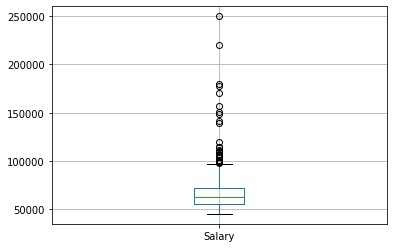

In [ ]:
df.boxplot(column="Salary")
plt.show()

Il salario più comune presente all'interno dell'azienda corrisponde a un intorno tra i 60 mila e i 75 mila dollari annui, con svariati outliers nella fascia 100-125 mila, 140-160 mila dollari annui. <br>Una concentrazione minore si trova in corrispondenza della fascia 175-180 mila dollari annui.<br>Sono inoltre presenti due singoli outliers, corrispondenti agli stipendi di 220 mila e 250 mila dollari annui, quest'ultimo corrispondente al CEO dell'azienda.

A questo punto, si è voluto visualizzare e gestire gli outliers, in modo da comprendere in che misura la loro presenza può condizionare o alterare test statistici.

I valori in questione sono stati estratti calcolando, prima il range interquartile, dato dalla differenza tra terzo e primo quartile, poi gli estremi superiore e inferiore.

In [ ]:
Q1 = df['Salary'].quantile(0.25, interpolation='linear')
Q3 = df['Salary'].quantile(0.75, interpolation='linear')
#range interquartile, dato dalla differenza tra terzo e primo quartile
IQR = Q3-Q1
#estremo inferiore
Lowerfence = Q1 - 1.5*IQR
#estremo superiore
Upperfence = Q3 + 1.5*IQR

In [ ]:
Upperfence

96837.75

Tutti i valori che si trovano sotto o sopra gli estremi calcolati, i quali hanno una funzione di "recinto", sono identificati come outliers. Per l'attributo *Salary* ne sono stati individuati 29 e si possono visualizzare di seguito:

In [ ]:
OUTLIERS = df.loc[(df['Salary'] < Lowerfence)  |  (df['Salary'] > Upperfence) ]
OUTLIERS

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,...,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,1/15/2015,0,8
25,"Booth, Frank",10199,0,0,1,4,3,3,0,103613,...,Simon Roup,4.0,LinkedIn,Fully Meets,3.50,5,7,1/10/2016,0,2
26,"Boutwell, Bonalyn",10081,1,1,0,1,1,3,1,106367,...,Brandon R. LeBlanc,3.0,Diversity Job Fair,Fully Meets,5.00,4,3,2/18/2019,0,4
39,"Carr, Claudia N",10082,0,0,0,2,3,3,0,100031,...,Simon Roup,4.0,LinkedIn,Fully Meets,5.00,5,6,2/18/2019,0,7
42,"Champaigne, Brian",10108,1,1,1,1,3,3,0,110929,...,Jennifer Zamora,5.0,Indeed,Fully Meets,4.50,5,7,1/15/2019,0,8
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,...,Janet King,2.0,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15
66,"Del Bosque, Keyla",10155,0,0,0,1,4,3,0,101199,...,Alex Sweetwater,10.0,CareerBuilder,Fully Meets,3.79,5,5,1/25/2019,0,8
76,"Dougall, Eric",10028,0,0,1,1,3,4,0,138888,...,Jennifer Zamora,5.0,Indeed,Exceeds,4.30,5,5,1/4/2019,0,4
86,"Exantus, Susan",10290,1,1,0,4,4,2,0,99280,...,Alex Sweetwater,10.0,Indeed,Needs Improvement,2.10,5,4,8/10/2012,4,19


É stata scartata la scelta di eliminare i record in questione poiché l'interesse principale, per le successive analisi, è quello di preservare il più possibile l'informazione originale dei dati. É stata, pertanto, considerata l'opzione di sostituire i valori anomali con il valore mediano dei salari. 

In [ ]:
Sal_median=df['Salary'].median()
Sal_median

62810.0

In [ ]:
#copia del dataset che ci consente di creare un dataset parallelo in cui i valori anomali della colonna Salary sono gestiti
df_sal_median=df.copy()

In [ ]:
#i valori per cui la condizione indicata è falsa sono sostituiti dalla mediana
df_sal_median["Salary"]=df["Salary"].where((df['Salary'] > Lowerfence)  & (df['Salary'] < Upperfence),Sal_median)

In [ ]:
#stampa della copia del dataset con i valori correttamente sostituiti
df_sal_median

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506.0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,62810.0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955.0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991.0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825.0,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893.0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513.0,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,62810.0,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292.0,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


Una volta sostituiti i valori, sono state estratte le diverse statistiche in modo da avere una comparazione tra la variabile originale e la copia modificata.

In [ ]:
df["Salary"].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [ ]:
df_sal_median["Salary"].describe()

count      311.000000
mean     62838.694534
std      11092.999826
min      45046.000000
25%      55501.500000
50%      62810.000000
75%      66295.000000
max      96820.000000
Name: Salary, dtype: float64

La prima cosa che si può osservare è un cambiamento della media, che comunque non è troppo significativo. L'osservazione più importante riguarda la deviazione standard, la cui variazione è invece rilevante, poiché si abbassa a tal punto da rendere la media rappresentativa del salario (la deviazione è minore del 30% della media).

Tuttavia, si è ritenuto che condurre le successive analisi su questa versione modificata del dataset potesse alterarne i risultati e che la sostituzione di valori potesse rappresentare una perdita d'informazione (come lo stipendio più alto che identifica il CEO).

#### MaritalStatusID ed EngagementSurvey

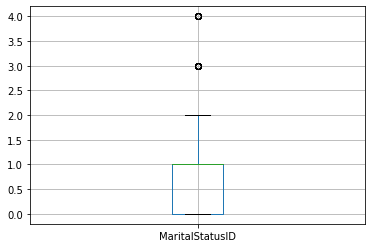

In [ ]:
df.boxplot(column="MaritalStatusID")
plt.show()

Il grafico evidenzia come la maggior parte degli impiegati presenti stati civili di single o sposato (ID 0 e 1), con una minoranza di persone divorziate (2) e rari casi di persone separate e vedove (ID 3 e 4).

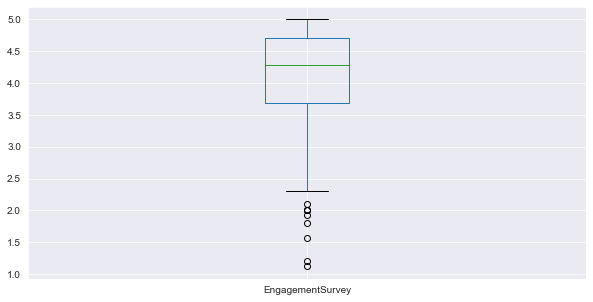

In [ ]:
df.boxplot(column="EngagementSurvey")
plt.show()

La distribuzione dell'attributo *EngagementSurvey*, che indica il grado di coinvolgimento assegnato a un impiegato da un partner esterno all'azienda, evidenzia una concentrazione di valori abbastanza alti, fatta eccezione per la presenza di outliers concentrati in corrispondenza del range di punteggio 2.1 - 2.5 e due singoli outliers che si posizionano in un punteggio inferiore a 1.5. 

Come per Salary, anche per le variabili MaritalStatusID e EnagementSurvey sono stati estratti e visualizzati i valori anomali che non rientrano negli estremi del boxplot corrispettivo.


In [ ]:
Q1 = df['MaritalStatusID'].quantile(0.25, interpolation='linear')
Q3 = df['MaritalStatusID'].quantile(0.75, interpolation='linear')
IQR = Q3-Q1
Lowerfence = Q1 - 1.5*IQR
Upperfence = Q3 + 1.5*IQR

In [ ]:
outliers_MaritalStatusID = df.loc[(df['MaritalStatusID'] < Lowerfence)  |  (df['MaritalStatusID'] > Upperfence) ]
outliers_MaritalStatusID

In [ ]:
Q1 = df['EngagementSurvey'].quantile(0.25, interpolation='linear')
Q3 = df['EngagementSurvey'].quantile(0.75, interpolation='linear')
IQR = Q3-Q1
Lowerfence = Q1 - 1.5*IQR
Upperfence = Q3 + 1.5*IQR

In [ ]:
outliers_EngagementSurvey = df.loc[(df['EngagementSurvey'] < Lowerfence)  |  (df['EngagementSurvey'] > Upperfence) ]
outliers_EngagementSurvey

Essendo questi valori riferiti allo stato civile proprio dell’impiegato in analisi e un punteggio assegnato in base al coinvolgimento del singolo, si è ritenuto che trattarli avrebbe significato distorcere l’informazione di cui sono portatori. 

## Statistiche descrittive

Si è poi proceduto con un'analisi di media, mediana e deviazione standard dei valori contenuti nel dataset. Si è deciso di escludere gli attributi di tipo oggetto date e la maggior parte degli interi di tipo identificatore, in quanto si sarebbero ricavati dati poco informativi, e di considerare soltanto gli attributi *PerfScoreID*, *Salary*, *EmpSatisfaction*, *SpecialProjectsCount*, *DaysLateLast30*, *Absences* ed *EngagementSurvey*.

##### Valori Medi

In [ ]:
print("Valor medio di PerfScoreID :", df['PerfScoreID'].mean())
print("Valor medio di Salary :",df['Salary'].mean())
print("Valor medio di EmpSatisfaction :",df['EmpSatisfaction'].mean())
print("Valor medio di EngagementSurvey :",df['EngagementSurvey'].mean())
print("Valor medio di SpecialProjectsCount :",df['SpecialProjectsCount'].mean())
print("Valor medio di DaysLateLast30 :",df['DaysLateLast30'].mean())
print("Valor medio di Absences :",df['Absences'].mean())

Valor medio di PerfScoreID : 2.977491961414791
Valor medio di Salary : 69020.6848874598
Valor medio di EmpSatisfaction : 3.8906752411575565
Valor medio di EngagementSurvey : 4.1099999999999985
Valor medio di SpecialProjectsCount : 1.2186495176848875
Valor medio di DaysLateLast30 : 0.41479099678456594
Valor medio di Absences : 10.237942122186496


##### Valori Mediani

In [ ]:
print("Valore mediano di PerfScoreID :",df['PerfScoreID'].median())
print("Valore mediano di Salary :",df['Salary'].median())
print("Valore mediano di EmpSatisfaction :",df['EmpSatisfaction'].median())
print("Valore mediano di EngagementSurvey :",df['EngagementSurvey'].median())
print("Valore mediano di SpecialProjectsCount :",df['SpecialProjectsCount'].median())
print("Valore mediano di DaysLateLast30 :",df['DaysLateLast30'].median())
print("Valore mediano di Absences :",df['Absences'].median())

Valore mediano di PerfScoreID : 3.0
Valore mediano di Salary : 62810.0
Valore mediano di EmpSatisfaction : 4.0
Valore mediano di EngagementSurvey : 4.28
Valore mediano di SpecialProjectsCount : 0.0
Valore mediano di DaysLateLast30 : 0.0
Valore mediano di Absences : 10.0


##### Deviazione standard

In [ ]:
print("Deviazione standard di PerfScoreID :",df['PerfScoreID'].std())
print("Deviazione standard di Salary :",df['Salary'].std())
print("Deviazione standard di EmpSatisfaction :",df['EmpSatisfaction'].std())
print("Deviazione standard di EngagementSurvey :",df['EngagementSurvey'].std())
print("Deviazione standard di SpecialProjectsCount :",df['SpecialProjectsCount'].std())
print("Deviazione standard di DaysLateLast30 :",df['DaysLateLast30'].std())
print("Deviazione standard di Absences :",df['Absences'].std())

Deviazione standard di PerfScoreID : 0.5870715836165233
Deviazione standard di Salary : 25156.636929646647
Deviazione standard di EmpSatisfaction : 0.9092410131521375
Deviazione standard di EngagementSurvey : 0.7899375230501339
Deviazione standard di SpecialProjectsCount : 2.349421227834242
Deviazione standard di DaysLateLast30 : 1.2945194168852272
Deviazione standard di Absences : 5.8525958627025645


Nella seguente tabella sono riassunti i risultati ottenuti. Possiamo constatare come, ad eccezione di *PerfScoreID*, *EmpSatisfaction* ed *EngagementSurvey*, i valori di deviazione standard per i restanti attributi sono maggiori del 30% della media e in alcuni casi anche più alti della stessa; pertanto, possiamo considerare la media come un indicatore non rappresentativo di questi.

Attributo | Media | Mediana | Dev. standard
------------|-------------|------------|----------
PerfScoreID|2.98|3.0|0.59
Salary|69020.68|62810|25156.64
EmpSatisfaction|3.89|4|0.91
EngagementSurvey|4.11|4.28|0.79
SpecialProjectsCount|1.22|0|2.35
DaysLateLast30|0.41|0|1.29
Absences|10.24|10|5.85

## Matrice di correlazione

Questa sezione è dedicata alla misura di correlazione tra coppie di attributi.
Avendo individuato la presenza di outliers e di attributi la cui distribuzione non presenta una forma normale, ed essendo questi dei fattori che possono inficiare la funzionalità di Pearson, si è deciso di utilizzare il coefficiente di correlazione di Spearman.

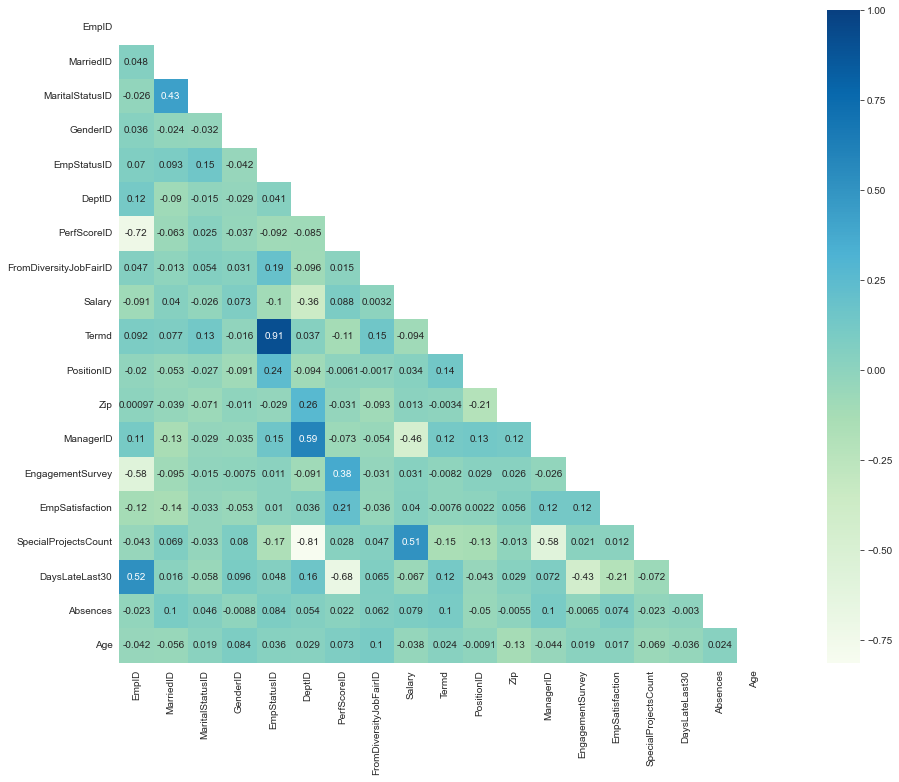

In [ ]:
corr = df.corr(method = 'spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,12))
    ax = sns.heatmap(corr, mask=mask, vmax=1.0, cmap='GnBu', square=True,annot=True )
plt.show()

Dalla matrice ottenuta si possono evincere correlazioni la cui presenza è logicamente prevedibile, come l'alta correlazione positiva di 0.91 tra gli attributi *Termd*, che indica se una persona lavora o no, ed *EmpStatusID*, che è il numero identificativo che rimanda allo stato occupazionale degli impiegati. La maggior parte delle correlazioni trovate può definirsi non significativa, in quanto compresa nel range di valori da -0.5 a 0.5.

## Distribuzioni di frequenza delle variabili numeriche tramite l'uso di istogrammi

L'analisi si è poi incentrata sull'esplorazione della distribuzione delle variabili numeriche più significative, analizzate graficamente attraverso l'utilizzo di istogrammi.<br>Per tutti i grafici sono disponibili rappresentazioni visuali dei valori di media e mediana, nei rispettivi colori nero e rosso. 

È stata inoltre calcolata la *Skewness*, parametro che ci fornisce indicazioni circa la simmetria della curva.

La prima variabile visionata è stata *Salary*, dalla cui rappresentazione è possibile osservare una decrescita esponenziale, che riflette una predominanza del numero di impiegati con uno stipendio inferiore ai 70 mila dollari annui; il numero di impiegati decresce all'aumentare dello stipendio, fino a raggiungere le poche unità per le cifre più alte.

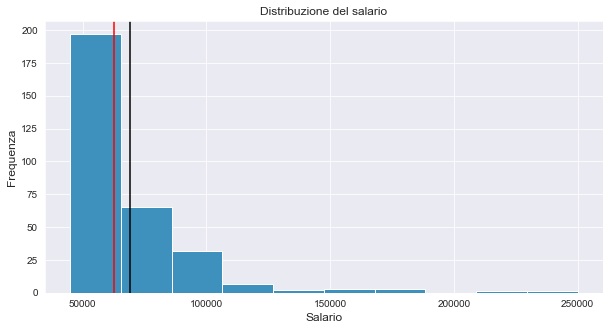

In [ ]:
x= 'Salario'
y= 'Frequenza'
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [10,5]
plt.hist(df['Salary'], color='#3e91bc')
plt.axvline(df['Salary'].mean(), color='k', linestyle='-')
plt.axvline(df['Salary'].median(), color='r', linestyle='-')
plt.title('Distribuzione del salario')
plt.xlabel(x, fontsize=12)
plt.ylabel(y, fontsize=12)
plt.show()

Il valore molto alto di skewness è indice di una curva che presenta una notevole distorsione verso destra, dove si trova la maggior parte dei dati e sono collocate media e mediana.

In [ ]:
Skew_Sal = df['Salary'].skew()
print("Skewness di Salary:", Skew_Sal)

Skewness: 3.30618080924006


Per quanto riguarda la variabile *EngagementSurvey*, invece, si può notare un andamento di crescita esponenziale, il quale rivela come alla maggioranza degli impiegati sia stato assegnato un livello abbastanza alto di coinvolgimento all'interno dell'azienda, a conferma dei risultati ottenuti dal boxplot della medesima variabile mostrato in precedenza.

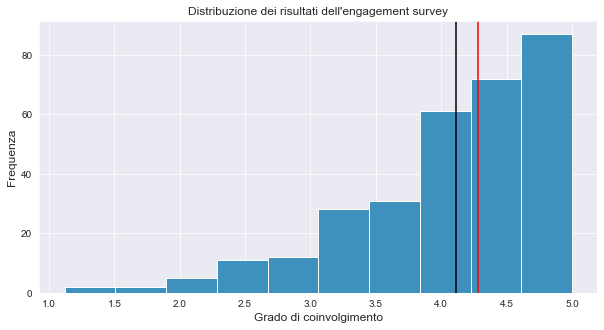

In [ ]:
x= 'Grado di coinvolgimento'
y= 'Frequenza'
plt.rcParams["figure.figsize"] = [10,5]
plt.hist(df['EngagementSurvey'],color='#3e91bc')
plt.axvline(df['EngagementSurvey'].mean(), color='k', linestyle='-')
plt.axvline(df['EngagementSurvey'].median(), color='r', linestyle='-')
plt.title('Distribuzione dei risultati dell\'engagement survey')
plt.xlabel(x, fontsize=12)
plt.ylabel(y, fontsize=12)
sns.set_style("darkgrid")
plt.show()

In questo caso la skewness è negativa, il che indica un'inclinazione verso sinistra; il valore calcolato suggerisce un'asimmetria di tipo moderato.

In [ ]:
Skew_EnSu = df['EngagementSurvey'].skew()
print("Skewness di EngagementSurvey:", Skew_EnSu)

EngagementSurvey: -1.116979334059904


Diverso è il caso dell'attributo *Absences*, la cui distribuzione di frequenza rivela un andamento bimodale.

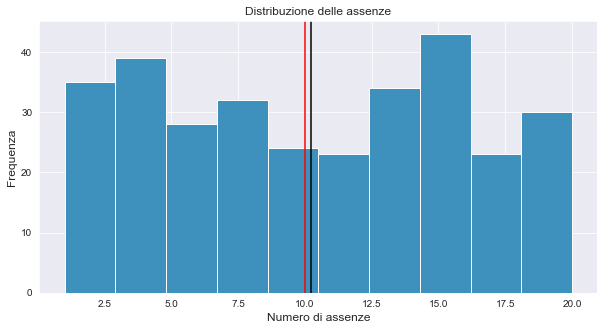

In [ ]:
x= 'Numero di assenze'
y= 'Frequenza'
plt.rcParams["figure.figsize"] = [10,5]
plt.hist(df['Absences'], color='#3e91bc')
plt.axvline(df['Absences'].mean(), color='k', linestyle='-')
plt.axvline(df['Absences'].median(), color='r', linestyle='-')
plt.title('Distribuzione delle assenze')
plt.xlabel(x, fontsize=12)
plt.ylabel(y, fontsize=12)
sns.set_style("darkgrid")
plt.show()

Dal calcolo della skewness, il cui risultato è intorno allo 0, si può definire la distribuzione di *Absences* come una simmetrica-bimodale.

In [ ]:
Skew_Abs = df['Absences'].skew()
print("Skewness di Absences:", Skew_Abs)

Absences: 0.029283456542675775


## Distribuzioni di variabili categoriali attraverso l'uso di *pie chart*, *donut chart* e *bar plot*

Volendo analizzare la distribuzione dei valori all'interno delle variabili categoriali *RecruitmentSource* ed *EmploymentStatus*, sono stati usati rispettivamente un *pie chart* e un *donut chart*.

Innanzitutto, è stato necessario estrarre la frequenza dei valori unici di *RecruitmentSource*, impiegati per la costruzione del primo grafico.

In [ ]:
occur_RS = df.groupby(['RecruitmentSource']).size()
display(occur_RS)

RecruitmentSource
CareerBuilder              23
Diversity Job Fair         29
Employee Referral          31
Google Search              49
Indeed                     87
LinkedIn                   76
On-line Web application     1
Other                       2
Website                    13
dtype: int64

Costituendo un numero esiguo di occorrenze, i valori di On-line Web application e Other sono stati raggruppati sotto la dicitura di *Other*.

Dal grafico a torta risultante è emerso come, per quasi un terzo degli impiegati (nello specifico il 28%) la principale fonte di assunzione sia stata Indeed, seguita da LinkedIn.

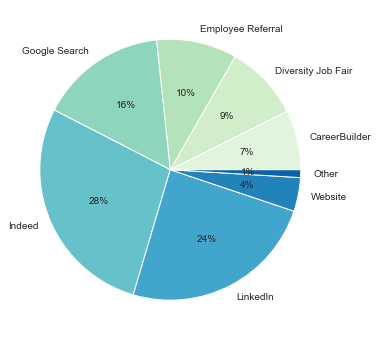

In [ ]:
data = [23,29,31,49,87,76,13,3]
labels = ['CareerBuilder', 'Diversity Job Fair', 'Employee Referral', 'Google Search', 'Indeed', 'LinkedIn', 'Website', 'Other']
plt.rcParams["figure.figsize"] = [14,6]
colors = sns.color_palette('GnBu', 8)
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

Osservando la distribuzione degli stati lavorativi degli impiegati, è interessante notare come vi sia una percentuale molto più alta di impiegati che hanno dato le dimissioni (28%) rispetto al numero di licenziamenti (5%).

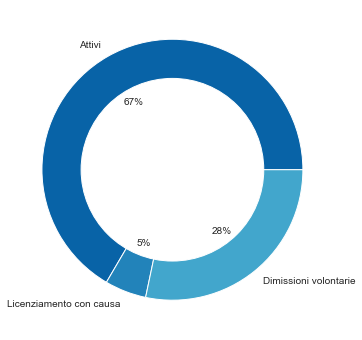

In [ ]:
plt.rcParams["figure.figsize"] = [14,6]
occur_ES = df.groupby(['EmploymentStatus']).size()
names = ['Attivi', 'Licenziamento con causa', 'Dimissioni volontarie']
colors = sns.color_palette('GnBu_r', 8)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(occur_ES, labels=names, colors=colors,autopct='%.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Questi dati hanno stimolato l'interesse nell'indagare le cause principali di abbandono dell'azienda.

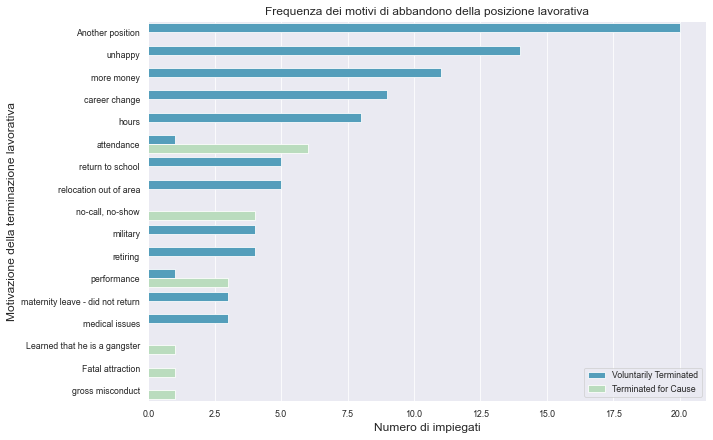

In [ ]:
#creazione set ausiliario in cui vengono eliminate tutte le istanze il cui valore di TermReason è "Ancora assunto", in quanto non utili per la nostra indagine
df_term= df[df['TermReason'] != 'N/A-StillEmployed'] 
plt.rcParams["figure.figsize"] = [10,7]
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.set_style("darkgrid")
ax = sns.countplot(y="TermReason", hue="EmploymentStatus", data=df_term, palette='GnBu_r', order = df_term['TermReason'].value_counts().index)
plt.legend(loc='lower right')
plt.title('Frequenza dei motivi di abbandono della posizione lavorativa')
plt.xlabel('Numero di impiegati')
plt.ylabel('Motivazione della terminazione lavorativa')
plt.show()

È possibile notare come tra le ragioni più frequenti di dimissioni vi siano insoddisfazioni alla posizione lavorativa, al salario o al numero di ore. Altre meno frequenti sono legate a cause di forza maggiore/motivi personali. Tra le cause di licenziamento rientrano per lo più scarse performance e comportamenti sconvenienti degli impiegati. 

Il grafico successivo evidenzia come la distribuzione dei valori all'interno della variabile *CitizenDesc* sia nettamente sbilanciata, con una predominanza piuttosto marcata di cittadini statunitensi all'interno dell'azienda.

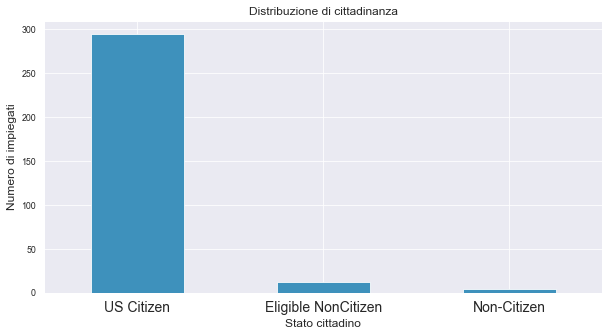

In [ ]:
plt.rcParams["figure.figsize"] = [10,5]
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.set_style("darkgrid")
df['CitizenDesc'].value_counts().plot(kind='bar', color='#3e91bc')
plt.title('Distribuzione di cittadinanza')
plt.xlabel('Stato cittadino')
plt.ylabel('Numero di impiegati')
plt.xticks(fontsize=14, rotation=0)
plt.show()

## Relazioni tra più variabili analizzate con diverse tipologie di grafici statici ed interattivi (*bar plot*, *line plot*, *area chart*, *scatter plot* e *pair plot*)

È stato ritenuto interessante osservare la distribuzione del salario a seconda del dipartimento di appartenenza degli impiegati, distinguendo tra uomini e donne.

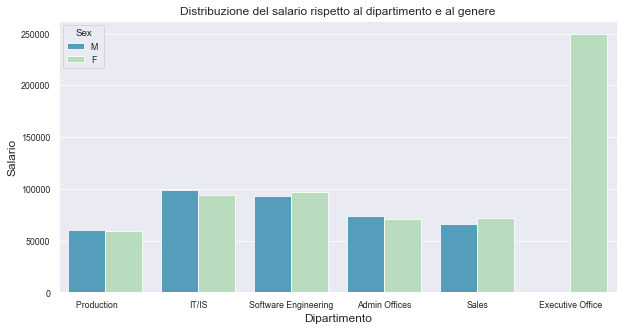

In [ ]:
sns.barplot(x="Department", y="Salary", hue="Sex", palette='GnBu_r',data=df,ci=None)
plt.rcParams["figure.figsize"] = [10,5]
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.set_style("darkgrid")
plt.title('Distribuzione del salario rispetto al dipartimento e al genere')
plt.ylabel('Salario')
plt.xlabel('Dipartimento')
plt.show()

Gli stipendi risultano bilanciati tra uomini e donne per le diverse posizioni lavorative, con stipendi medi più alti per i reparti di IT/IS e Software Engineering, i quali contano lo svolgimento di un maggior numero di progetti, come è risultato da un'analisi che presentata successivamente. L'unico sbilanciamento presente si colloca in corrispondenza dell'ufficio esecutivo, che presenta uno stipendio maggiore rispetto agli altri dipartimenti.

Si è poi passati ad un confronto di salario medio rispetto alle differenti etnie specificate dalla colonna *RaceDesc*.<br> Dal grafico ricavato è emersa una distribuzione abbastanza bilanciata tra le differenti categorie; la categoria che risulta avere un compenso più alto è quella ispanica. 

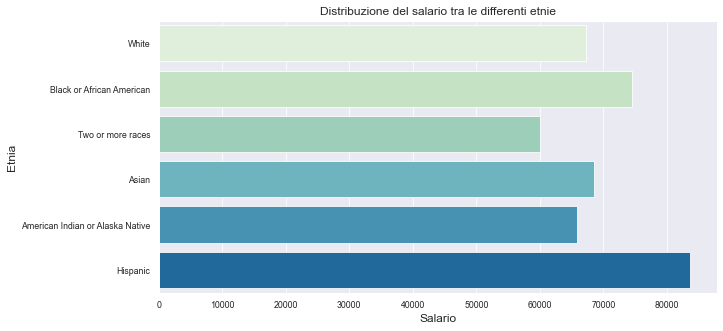

In [ ]:
sns.barplot(x="Salary", y="RaceDesc", palette='GnBu', data=df, ci=None)
plt.rcParams["figure.figsize"] = [10,5]
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.set_style("darkgrid")
plt.title('Distribuzione del salario tra le differenti etnie')
plt.ylabel('Etnia')
plt.xlabel('Salario')
plt.show()

È stato utilizzato uno stacked bar chart per analizzare se e come lo stato civile di un impiegato influisca sul numero di assenze dal posto di lavoro, considerando al contempo una distinzione basata sul genere di appartenenza. I valori sono stati aggregati utilizzando la mediana.

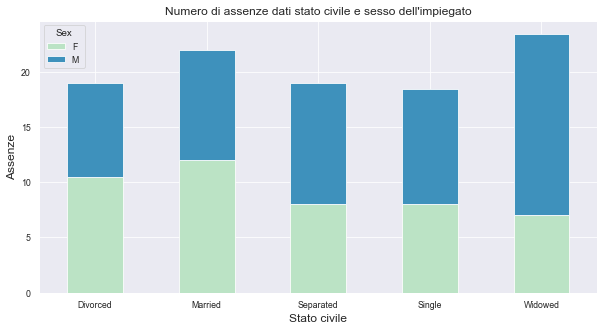

In [ ]:
Summary1 = pd.crosstab(df['MaritalDesc'], df['Sex'], values=df['Absences'], aggfunc=np.median)
plt.rcParams["figure.figsize"] = [10,5]
Summary1.plot(kind="bar",stacked=True, color=['#bbe3c5', '#3e91bc'])
plt.title("Numero di assenze dati stato civile e sesso dell'impiegato")
plt.ylabel("Assenze")
plt.xlabel("Stato civile")
plt.xticks(rotation=0)
plt.show()

Dal grafico si evince come il numero di assenze sia abbastanza equamente distribuito tra i due sessi per ogni categoria. Tendenzialmente, gli uomini registrano più assenze per le categorie "Separated" e "Single", in modo più marcato per la classe "Widowed". Gli stati civili in cui si riscontrano un maggior numero di assenze sono "Married" e "Widowed".


La variabile principale su cui si è incentrata la ricerca di possibili correlazioni è stata *Salary*. Nonostante la correlazione tra le variabili *Salary* e *SpecialProjectsCounts* non abbia restituito un valore rilevante (0.51), si è comunque voluto osservare la distribuzione dei valori rispetto a questi due attributi attraverso uno scatterplot. Inoltre, attraverso il parametro hue, è stato assegnato ad ogni punto nel grafico un colore differente a seconda che si tratti di un impiegato di genere maschile o femminile.<br>
Il grafico ottenuto ci consente di confermare l'ipotesi che la correlazione tra le variabili considerate non sia significativa. Si può inoltre trovare conferma dei risultati ottenuti dai grafici precedenti, come il fatto che gli impiegati che guadagnano di più sono donne. </br>L'osservazione principale è che le persone con stipendi elevati non realizzano un alto numero di progetti speciali.

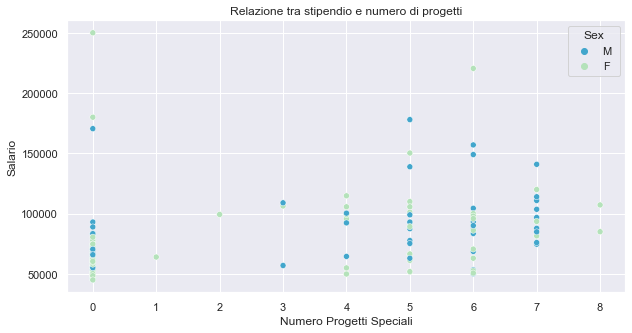

In [ ]:
plt.rcParams["figure.figsize"] = [10,5]
sns.set_context("notebook", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.scatterplot(x="SpecialProjectsCount", y="Salary", hue='Sex', palette='GnBu_r', data=df)
sns.set_style("darkgrid")
plt.title("Relazione tra stipendio e numero di progetti")
plt.xlabel("Numero Progetti Speciali")
plt.ylabel("Salario")
plt.show()

Il seguente pairplot è stato realizzato per visualizzare le relazioni a coppie tra le variabili *Salary*, *DaysLateLast30* e *PerfScoreID*, in modo da osservare se i ritardi accumulati dai dipendenti influiscano in qualche modo sul punteggio che viene loro assegnato e, di conseguenza, sullo stipendio.<br> Osservando i grafici posti sulla diagonale, che contengono le distribuzioni dei dati per ciascun attributo, è interessante notare come la variabile *PerfScoreID*, diversamente dalle altre due, segua una curva normale.<br> Si può inoltre riscontrare come ai dipendenti che registrano un numero di ritardi pari a 0, corrispondano un importo salariale e un punteggio di prestazione più alti.

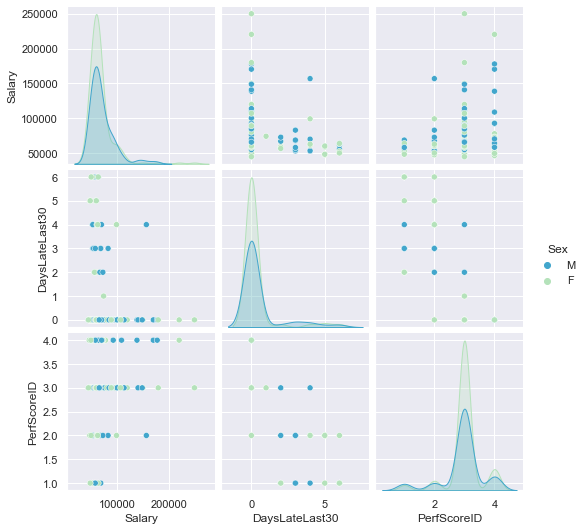

In [ ]:
sns.pairplot(df, hue='Sex',diag_kind="kde", palette='GnBu_r', x_vars=["Salary", "DaysLateLast30", "PerfScoreID"], y_vars=["Salary", "DaysLateLast30", "PerfScoreID"],)
plt.show()

Al fine di realizzare un'analisi che tenga conto dell'età degli impiegati, quest'ultima è stata ricavata, per ciascun dipendente, sfruttando l'attributo *Date of Birth*.

In [ ]:
#estrazione e formattazione in formato %d-%m-%Y della giornata corrente
w=date.today()
w=w.strftime("%d-%m-%Y")
#definizione funzione che prende in input due date e ne calcola l'intervallo di tempo in termini di anni
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%d-%m-%Y")
    d2 = datetime.strptime(d2, "%d-%m-%Y")
    return abs(relativedelta(d2, d1).years)
#applicazione formattazione %d-%m-%Y agli anni di nascita contenuti nel dataset
d=pd.to_datetime(df["DOB"]).apply(lambda x:x.strftime("%d-%m-%Y"))
#definizione nuovo attributo Age che contiene l'età dei dipendenti
df["Age"]=d.apply(lambda x:days_between(x, w))

Una volta estratte le età dei singoli, si è scelto di indagare con un grafico interattivo la distribuzione di esse tra i dipendenti, considerando il genere d'appartenenza. Tendenzialmente, si registra un numero più alto di donne nelle diverse fasce, ad eccezione della fascia 38-39 anni per cui si registra un numero di uomini più alto. 

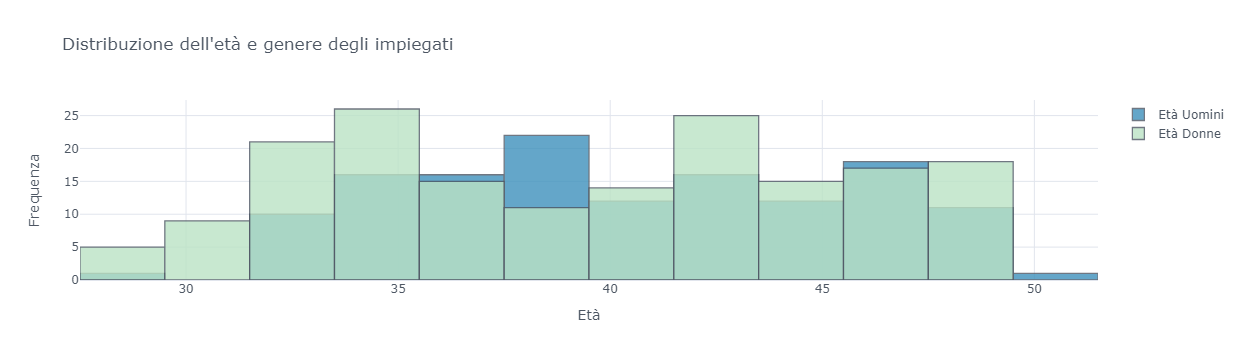

In [ ]:
df["Età Uomini"]=df[df["GenderID"]==1]["Age"]
df["Età Donne"]=df[df["GenderID"]==0]["Age"]
df[["Età Uomini","Età Donne"]].iplot(kind="histogram", bins=20, theme="white", title="Distribuzione dell'età e genere degli impiegati",color=[ '#3e91bc','#bbe3c5'],
         xTitle='Età', yTitle='Frequenza', dimensions=(1200,500))

Il seguente grafico, di tipo *stacked area*, mostra l'evoluzione del numero di progetti data l'età degli impiegati e il dipartimento di appartenenza. È possibile notare come la maggior parte dei progetti sia affidata a impiegati dall'età compresa tra i 31 e i 39 anni, con un picco in discesa in corrispondenza dei 37 anni. La prevalenza di progetti riguarda l'ambito IT/IS e di Software Engineering.

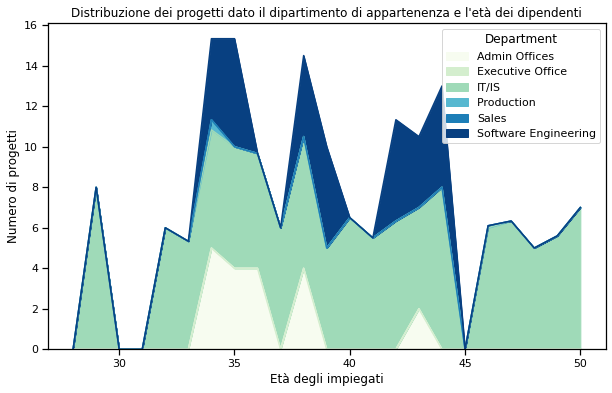

In [ ]:
Summary2=pd.crosstab(df['Age'], df['Department'], values=df['SpecialProjectsCount'], aggfunc=np.mean)
plt.rcParams["figure.figsize"] = [12,6]
sns.set_context("notebook", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
Summary2.plot(kind="area",stacked=True, cmap="GnBu")
sns.set_style("darkgrid")
plt.title("Distribuzione dei progetti dato il dipartimento di appartenenza e l'età dei dipendenti")
plt.ylabel("Numero di progetti")
plt.xlabel("Età degli impiegati")
plt.show()

Al fine di potenziare la visualizzazione e rendere più distinguibili le aree più piccole, si è deciso di implementare una versione interattiva del medesimo grafico.

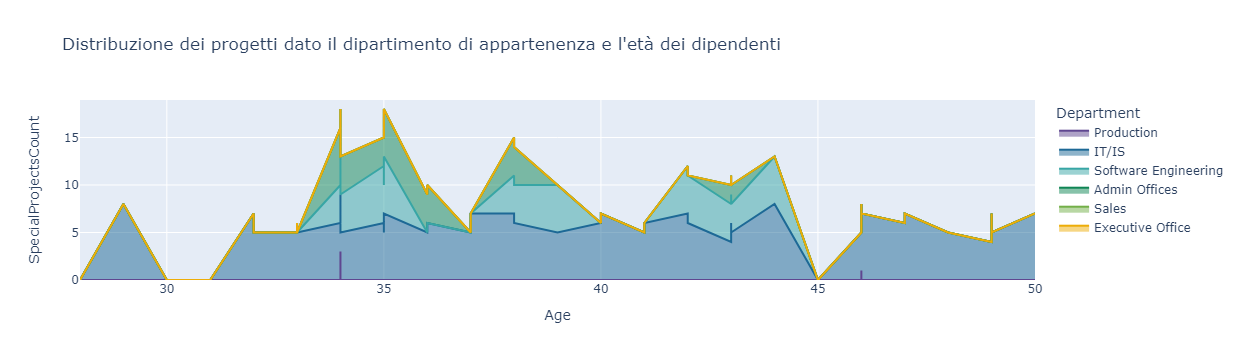

In [ ]:
import plotly.express as px
fig = px.area(df, x="Age", y="SpecialProjectsCount", color="Department", title="Distribuzione dei progetti dato il dipartimento di appartenenza e l'età dei dipendenti",color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

Si è voluto poi indagare quanto lo stato matrimoniale degli impiegati assunti in un anno specifico influisca sul salario. I dati mostrano due evidenti picchi in salita in corrispondenza degli anni di assunzione 2010 e 2017 nei salari per i dipendenti non sposati; in generale, si evidenzia una tendenza di stipendi medi più alta per le persone non sposate, fatta eccezione per l'arco di anni 2011-2016 dove gli stipendi tra le due categorie si collocano in un intervallo ristretto di livello stipendiale.

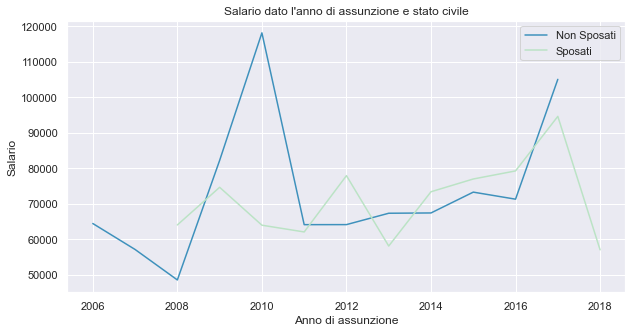

In [ ]:
df['YearofHire'] = pd.DatetimeIndex(df['DateofHire']).year
Summary3 = pd.crosstab(df['YearofHire'], df['MarriedID'], values=df['Salary'],aggfunc=np.mean)
plt.rcParams["figure.figsize"] = [10,5]
sns.set_style("darkgrid")
Summary3.plot(kind="line", color=['#3e91bc', '#bbe3c5'])
plt.title("Salario dato l'anno di assunzione e stato civile")
plt.ylabel("Salario")
plt.legend( ['Non Sposati', 'Sposati']);
plt.xlabel("Anno di assunzione")
plt.show()

Continuando sulla serie di indagini riguardanti il salario, si è deciso di valutare quanto lo stipendio influisca sul grado di soddisfazione dei dipendenti; dal grafico si evince come ci sia effettivamente un certo legame tra questi due fattori: valori più bassi di stipendi sono legati a valori di soddisfazione più bassi nei confronti del proprio impiego e viceversa.<br> Assumendo come valore accettabile il 3 su un massimo di 5, il valore dello stipendio medio per questo punteggio si aggira intorno ai 70.000 dollari.

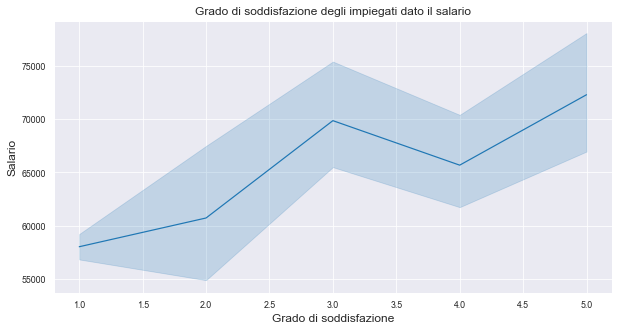

In [ ]:
plt.rcParams["figure.figsize"] = [10,5]
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.lineplot(x="EmpSatisfaction", y="Salary", palette='GnBu_r', data=df)
sns.set_style("darkgrid")
plt.title('Grado di soddisfazione degli impiegati dato il salario')
plt.xlabel("Grado di soddisfazione")
plt.ylabel("Salario")
plt.show()

In seguito, si è deciso di osservare il rapporto tra il salario e il livello di coinvolgimento dei dipendenti, tenendo in considerazione il sesso di appartenenza. Il grafico mostra come gradi maggiori di coinvolgimento siano raggiunti dalle donne piuttosto che dagli uomini, nonostante la distribuzione degli stipendi tra uomini e donne sia pressochè bilanciata e si aggiri tra i 50.000 e 100.000 dollari, intervallo in cui si concentrano il maggior numero dei dipendenti dell'azienda. Il livello d'engagement presenta valori abbastanza positivi, concentrati dal punteggio 3 al 5; eccezioni si verificano per un minor numero di dipendenti che hanno riportato valori di engagement più bassi, dove il livello minimo (1) è stato assegnato unicamente a dipendenti di sesso maschile e con un salario più basso.

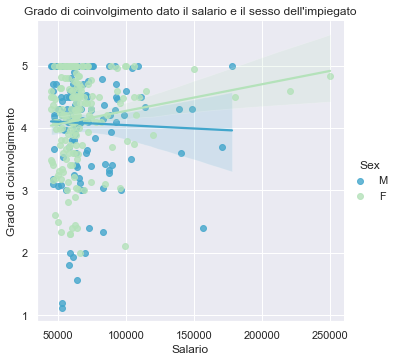

In [ ]:
sns.set_context("notebook", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.lmplot(x="Salary", y="EngagementSurvey", hue='Sex', palette='GnBu_r', data=df)
sns.set_style("darkgrid")
plt.title('Grado di coinvolgimento dato il salario e il sesso dell\'impiegato')
plt.xlabel("Salario")
plt.ylabel("Grado di coinvolgimento")
plt.show()

Dal momento che la matrice di correlazione calcolata con Spearman non ha prodotto nessuna evidenza di legame interessante, si è deciso di costruire un'altra matrice con iplot che utilizza un'altra metrica, selezionando solo gli attributi che nel corso dell'analisi svolta hanno rivelato essere i più interessanti. 

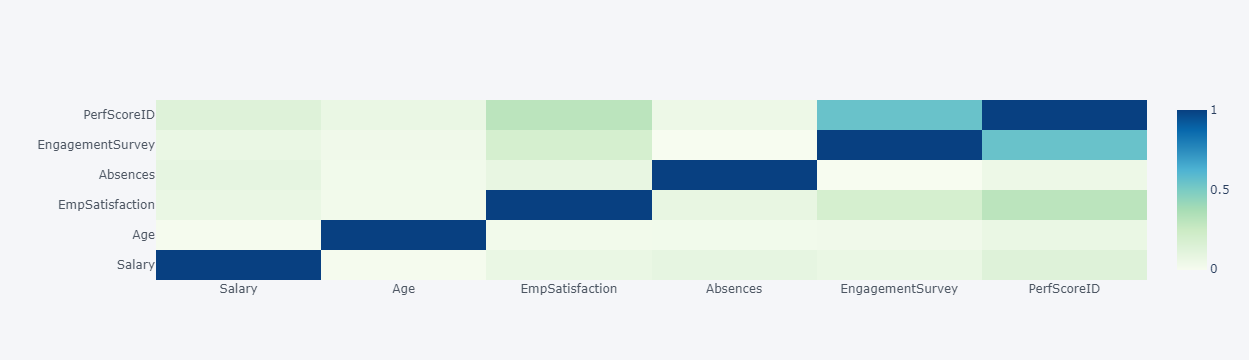

In [ ]:
df_heat=df[['Salary','Age','EmpSatisfaction','Absences','EngagementSurvey','PerfScoreID']]
df_heat.corr().iplot(kind = 'heatmap', colorscale='GnBu', dimensions=(1200,500))

Infine, si è voluto porre l'attenzione sugli attributi *EngagementSurvey* e *PerfScoreID*, allo scopo di evidenziare in che misura il punteggio che viene assegnato alla performance di un impiegato differisce dal grado di coinvolgimento che gli viene attribuito da una partner esterno all'azienda. Il grafico scelto in questo caso è stato uno *Spread plot*, il quale mostra lo scarto tra due distribuzioni per i vari punti (dipendenti) del dataset. Prima di procedere alla costruzione del grafico interattivo, si è ritenuto necessario procedere a una normalizzazione dei dati, poiché le scale nelle quali sono espressi i due punteggi non sono le stesse (*PerfScoreID* va da 1 a 4, *EngagementSurvey* da 1 a 5). 

In [ ]:
scaler=MinMaxScaler()
numpy_normalized= scaler.transform(df[['EngagementSurvey','PerfScoreID']])
#conversione di struttura numpy array in dataframe
df_normalized = pd.DataFrame(numpy_normalized, columns = ['EngagementSurvey','PerfScoreID'])

Dai risultati ottenuti è possibile trovare conferma che, effettivamente, non esiste una stretta correlazione tra le due distribuzioni, dal momento che un grado di coinvolgimento alto non garantisce un altrettanto alto punteggio di performance. Anzi, in corrispondenza dei picchi di spread si può notare come impiegati con una performance molto bassa siano valutati in maniera molto positiva da partner esterni. 

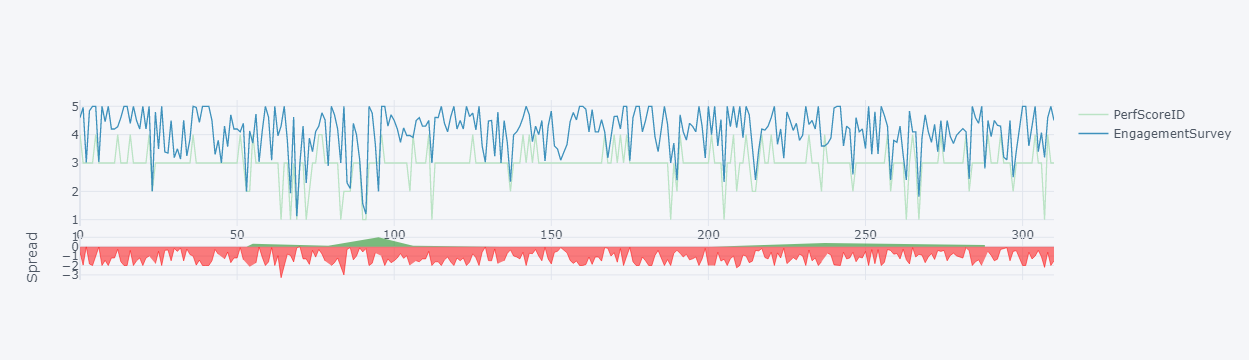

In [ ]:
df_normalized[['PerfScoreID','EngagementSurvey']].iplot(kind = 'spread',color=['#bbe3c5', '#3e91bc'], dimensions=(1200,500))